In [27]:
import os
import glob
import json
import shutil
import h5py
import sys
import time
from IPython.display import display

import torch

sys.path.insert(0, '..')
from corr_methods import load_representations

## Compute neuron/layer similarities based on activations
Using first N token representations from WSJ POS tagging sentences.

Saves to files in ../results/LTH-base/

In [28]:
# Set arguments to load reps
limit = 10000
model_count = 9
lth_iters = range(model_count)
reps_dir = '/raj-learn/data/precomputed_reps'
rep_fname_l = sorted(glob.glob(f'{reps_dir}/LTH*/pos_wsj_sentences.hdf5'))
layerspec_l = ['all' for i in range(len(rep_fname_l))]
first_half_only_l = False
second_half_only_l = False
device = 'cuda'
rep_fname_l

['/raj-learn/data/precomputed_reps/LTH0/pos_wsj_sentences.hdf5',
 '/raj-learn/data/precomputed_reps/LTH1/pos_wsj_sentences.hdf5',
 '/raj-learn/data/precomputed_reps/LTH2/pos_wsj_sentences.hdf5',
 '/raj-learn/data/precomputed_reps/LTH3/pos_wsj_sentences.hdf5',
 '/raj-learn/data/precomputed_reps/LTH4/pos_wsj_sentences.hdf5',
 '/raj-learn/data/precomputed_reps/LTH5/pos_wsj_sentences.hdf5',
 '/raj-learn/data/precomputed_reps/LTH6/pos_wsj_sentences.hdf5',
 '/raj-learn/data/precomputed_reps/LTH7/pos_wsj_sentences.hdf5',
 '/raj-learn/data/precomputed_reps/LTH8/pos_wsj_sentences.hdf5']

In [234]:
%%time
num_neurons_d, representations_d = load_representations(rep_fname_l,
                                                        limit=limit, 
                                                        layerspec_l=layerspec_l, 
                                                        first_half_only_l=first_half_only_l,
                                                        second_half_only_l=second_half_only_l)

9it [19:09, 127.74s/it]

CPU times: user 1min 49s, sys: 3.91 s, total: 1min 53s
Wall time: 19min 9s


In [235]:
import importlib

import corr_methods
importlib.reload(corr_methods)

from corr_methods import MaxCorr, MinCorr, MaxLinReg, MinLinReg, CCA, LinCKA

In [236]:
%%time
maxcorr = corr_methods.MaxCorr(num_neurons_d, None, device)
mincorr = corr_methods.MinCorr(num_neurons_d, None, device)
maxlinreg = corr_methods.MaxLinReg(num_neurons_d, None, device)
minlinreg = corr_methods.MinLinReg(num_neurons_d, None, device)
cca = corr_methods.CCA(num_neurons_d, None, device)
lincka = corr_methods.LinCKA(num_neurons_d, None, device)

CPU times: user 32 µs, sys: 5 µs, total: 37 µs
Wall time: 48.2 µs


In [237]:
%%time
output_dir = '../results/LTH-base/pos_wsj/'
for corr_method in [maxcorr, mincorr, maxlinreg, minlinreg, cca, lincka]:
# for corr_method in [cca]:
    t0 = time.time()
    method_name = str(corr_method)
    print(method_name)
    corr_method.representations_d = representations_d.copy()
    corr_method.compute_correlations()
    corr_method.write_correlations(output_dir + method_name)
    print('%s took %.2fsec' % (method_name, time.time() - t0))

mu, sigma:   2%|▏         | 1/54 [00:00<00:08,  6.03it/s]

maxcorr


mu, sigma:   7%|▋         | 4/54 [00:00<00:01, 30.12it/s]

maxcorr took 70.33sec
mincorr


mu, sigma:   0%|          | 0/54 [00:00<?, ?it/s]

mincorr took 71.38sec
maxlinreg


mu, sigma:   0%|          | 0/54 [00:00<?, ?it/s]

maxlinreg took 136.74sec
minlinreg


mu, sigma:   0%|          | 0/54 [00:00<?, ?it/s]

minlinreg took 140.39sec
cca


pca:   2%|▏         | 1/54 [00:01<01:29,  1.68s/it]

For network LTH0-pos_wsj_sentences.hdf5_0 wanted size is 811


pca:   4%|▎         | 2/54 [00:04<01:40,  1.93s/it]

For network LTH0-pos_wsj_sentences.hdf5_1 wanted size is 875


pca:   6%|▌         | 3/54 [00:05<01:36,  1.89s/it]

For network LTH0-pos_wsj_sentences.hdf5_2 wanted size is 897


pca:   7%|▋         | 4/54 [00:07<01:36,  1.92s/it]

For network LTH0-pos_wsj_sentences.hdf5_3 wanted size is 912


pca:   9%|▉         | 5/54 [00:09<01:33,  1.91s/it]

For network LTH0-pos_wsj_sentences.hdf5_4 wanted size is 922


pca:  11%|█         | 6/54 [00:11<01:27,  1.82s/it]

For network LTH0-pos_wsj_sentences.hdf5_5 wanted size is 919


pca:  13%|█▎        | 7/54 [00:13<01:23,  1.78s/it]

For network LTH1-pos_wsj_sentences.hdf5_0 wanted size is 820


pca:  15%|█▍        | 8/54 [00:14<01:16,  1.67s/it]

For network LTH1-pos_wsj_sentences.hdf5_1 wanted size is 884


pca:  17%|█▋        | 9/54 [00:16<01:15,  1.68s/it]

For network LTH1-pos_wsj_sentences.hdf5_2 wanted size is 904


pca:  19%|█▊        | 10/54 [00:17<01:13,  1.68s/it]

For network LTH1-pos_wsj_sentences.hdf5_3 wanted size is 919


pca:  20%|██        | 11/54 [00:20<01:19,  1.84s/it]

For network LTH1-pos_wsj_sentences.hdf5_4 wanted size is 928


pca:  22%|██▏       | 12/54 [00:22<01:21,  1.95s/it]

For network LTH1-pos_wsj_sentences.hdf5_5 wanted size is 926


pca:  24%|██▍       | 13/54 [00:24<01:19,  1.94s/it]

For network LTH2-pos_wsj_sentences.hdf5_0 wanted size is 823


pca:  26%|██▌       | 14/54 [00:26<01:16,  1.92s/it]

For network LTH2-pos_wsj_sentences.hdf5_1 wanted size is 886


pca:  28%|██▊       | 15/54 [00:27<01:12,  1.86s/it]

For network LTH2-pos_wsj_sentences.hdf5_2 wanted size is 906


pca:  30%|██▉       | 16/54 [00:29<01:07,  1.78s/it]

For network LTH2-pos_wsj_sentences.hdf5_3 wanted size is 920


pca:  31%|███▏      | 17/54 [00:31<01:09,  1.88s/it]

For network LTH2-pos_wsj_sentences.hdf5_4 wanted size is 929


pca:  33%|███▎      | 18/54 [00:33<01:04,  1.79s/it]

For network LTH2-pos_wsj_sentences.hdf5_5 wanted size is 929


pca:  35%|███▌      | 19/54 [00:34<01:02,  1.79s/it]

For network LTH3-pos_wsj_sentences.hdf5_0 wanted size is 823


pca:  37%|███▋      | 20/54 [00:36<00:59,  1.74s/it]

For network LTH3-pos_wsj_sentences.hdf5_1 wanted size is 885


pca:  39%|███▉      | 21/54 [00:38<00:56,  1.72s/it]

For network LTH3-pos_wsj_sentences.hdf5_2 wanted size is 905


pca:  41%|████      | 22/54 [00:40<00:56,  1.78s/it]

For network LTH3-pos_wsj_sentences.hdf5_3 wanted size is 919


pca:  43%|████▎     | 23/54 [00:42<00:57,  1.84s/it]

For network LTH3-pos_wsj_sentences.hdf5_4 wanted size is 928


pca:  44%|████▍     | 24/54 [00:43<00:54,  1.83s/it]

For network LTH3-pos_wsj_sentences.hdf5_5 wanted size is 929


pca:  46%|████▋     | 25/54 [00:45<00:52,  1.80s/it]

For network LTH4-pos_wsj_sentences.hdf5_0 wanted size is 822


pca:  48%|████▊     | 26/54 [00:47<00:50,  1.80s/it]

For network LTH4-pos_wsj_sentences.hdf5_1 wanted size is 882


pca:  50%|█████     | 27/54 [00:49<00:49,  1.83s/it]

For network LTH4-pos_wsj_sentences.hdf5_2 wanted size is 901


pca:  52%|█████▏    | 28/54 [00:50<00:45,  1.75s/it]

For network LTH4-pos_wsj_sentences.hdf5_3 wanted size is 916


pca:  54%|█████▎    | 29/54 [00:52<00:44,  1.77s/it]

For network LTH4-pos_wsj_sentences.hdf5_4 wanted size is 925


pca:  56%|█████▌    | 30/54 [00:54<00:44,  1.84s/it]

For network LTH4-pos_wsj_sentences.hdf5_5 wanted size is 927


pca:  57%|█████▋    | 31/54 [00:56<00:40,  1.77s/it]

For network LTH5-pos_wsj_sentences.hdf5_0 wanted size is 821


pca:  59%|█████▉    | 32/54 [00:57<00:37,  1.69s/it]

For network LTH5-pos_wsj_sentences.hdf5_1 wanted size is 878


pca:  61%|██████    | 33/54 [01:00<00:38,  1.84s/it]

For network LTH5-pos_wsj_sentences.hdf5_2 wanted size is 898


pca:  63%|██████▎   | 34/54 [01:01<00:37,  1.86s/it]

For network LTH5-pos_wsj_sentences.hdf5_3 wanted size is 912


pca:  65%|██████▍   | 35/54 [01:04<00:37,  1.96s/it]

For network LTH5-pos_wsj_sentences.hdf5_4 wanted size is 921


pca:  67%|██████▋   | 36/54 [01:05<00:33,  1.85s/it]

For network LTH5-pos_wsj_sentences.hdf5_5 wanted size is 923


pca:  69%|██████▊   | 37/54 [01:07<00:30,  1.78s/it]

For network LTH6-pos_wsj_sentences.hdf5_0 wanted size is 818


pca:  70%|███████   | 38/54 [01:10<00:34,  2.14s/it]

For network LTH6-pos_wsj_sentences.hdf5_1 wanted size is 873


pca:  72%|███████▏  | 39/54 [01:12<00:30,  2.04s/it]

For network LTH6-pos_wsj_sentences.hdf5_2 wanted size is 893


pca:  74%|███████▍  | 40/54 [01:13<00:26,  1.88s/it]

For network LTH6-pos_wsj_sentences.hdf5_3 wanted size is 907


pca:  76%|███████▌  | 41/54 [01:15<00:24,  1.86s/it]

For network LTH6-pos_wsj_sentences.hdf5_4 wanted size is 916


pca:  78%|███████▊  | 42/54 [01:17<00:21,  1.81s/it]

For network LTH6-pos_wsj_sentences.hdf5_5 wanted size is 918


pca:  80%|███████▉  | 43/54 [01:19<00:22,  2.08s/it]

For network LTH7-pos_wsj_sentences.hdf5_0 wanted size is 816


pca:  81%|████████▏ | 44/54 [01:21<00:19,  1.96s/it]

For network LTH7-pos_wsj_sentences.hdf5_1 wanted size is 868


pca:  83%|████████▎ | 45/54 [01:23<00:17,  1.91s/it]

For network LTH7-pos_wsj_sentences.hdf5_2 wanted size is 888


pca:  85%|████████▌ | 46/54 [01:24<00:14,  1.76s/it]

For network LTH7-pos_wsj_sentences.hdf5_3 wanted size is 901


pca:  87%|████████▋ | 47/54 [01:26<00:13,  1.86s/it]

For network LTH7-pos_wsj_sentences.hdf5_4 wanted size is 910


pca:  89%|████████▉ | 48/54 [01:28<00:11,  1.87s/it]

For network LTH7-pos_wsj_sentences.hdf5_5 wanted size is 912


pca:  91%|█████████ | 49/54 [01:30<00:08,  1.73s/it]

For network LTH8-pos_wsj_sentences.hdf5_0 wanted size is 814


pca:  93%|█████████▎| 50/54 [01:31<00:06,  1.72s/it]

For network LTH8-pos_wsj_sentences.hdf5_1 wanted size is 863


pca:  94%|█████████▍| 51/54 [01:34<00:05,  1.90s/it]

For network LTH8-pos_wsj_sentences.hdf5_2 wanted size is 882


pca:  96%|█████████▋| 52/54 [01:35<00:03,  1.87s/it]

For network LTH8-pos_wsj_sentences.hdf5_3 wanted size is 895


pca:  98%|█████████▊| 53/54 [01:37<00:01,  1.81s/it]

For network LTH8-pos_wsj_sentences.hdf5_4 wanted size is 903


cca:   0%|          | 0/2916 [00:00<?, ?it/s]

For network LTH8-pos_wsj_sentences.hdf5_5 wanted size is 906


mu, sigma:   4%|▎         | 2/54 [00:00<00:04, 10.84it/s]

cca took 3780.94sec
lincka


lincka: 100%|██████████| 2916/2916 [00:24<00:00, 118.28it/s]

lincka took 27.55sec
CPU times: user 7h 48min 12s, sys: 1h 2min 42s, total: 8h 50min 54s
Wall time: 1h 10min 27s


## Analyze neuron-level similarity between layers
We first consider 'neuronsim', a measure of local representation similarity of two layers. This metric is computed as follows: for each neuron in layer L, compute max correlation with any neuron in layer L'. Then, the similarity between L and L' is given by the mean of all those max correlations. MaxCorr or MinCorr refers to whether we consider the most "important" neurons for a given layer as the ones that have the highest maximal correlation with neurons in any other layer or ones that have the highest minimal correlation with neurons in any other layer.

We next consider 'mixedsim', a measure of how a local representation in layer L is predicted by the overall representation of layer L'. In particular, we regress Y, the output of a neuron in L, as a linear function of X, the full-dim representation output of layer L' (regression learned from each of the tokens we have a representation for). The correlation of our regression to Y is the similarity metric. We then average this metric across all neurons in layer L.

In [3]:
%%time
import pickle

results_dir = '../results/LTH-base/pos_wsj/'
res_fname = {method : results_dir + method for method in 
                {"maxcorr", "mincorr", "maxlinreg", "minlinreg", "cca", "lincka"}}

res_dict = {}
res_dict["maxcorr"] = pickle.load(open(res_fname["maxcorr"], "rb"))
res_dict["mincorr"] = pickle.load(open(res_fname["mincorr"], "rb"))
res_dict["maxlinreg"] = pickle.load(open(res_fname["maxlinreg"], "rb"))
res_dict["minlinreg"] = pickle.load(open(res_fname["minlinreg"], "rb"))

CPU times: user 7.58 s, sys: 1.1 s, total: 8.68 s
Wall time: 15.6 s


In [4]:
layer_names = list(res_dict['maxcorr']['corrs'].keys())
num_neurons = len(res_dict['maxcorr']['neuron_sort'][layer_names[0]])

In [5]:
print(res_dict['maxcorr'].keys())
print(res_dict['maxlinreg'].keys())

dict_keys(['corrs', 'pairs', 'similarities', 'neuron_sort', 'neuron_notated_sort'])
dict_keys(['pred_power', 'similarities', 'neuron_sort', 'neuron_notated_sort'])


Do neurons retain behavior as sparsity increases? We can estimate this question by computing the number of neurons in layer L, pruning iteration 0 that have highest correlation with the same neuron at a later pruning iteration P. Then, we can compute the same fraction with the top K (perhaps K=128) neurons; i.e., for the K pairs of neurons with highest correlation between pruning iteration 0 and P, how many of the pairs are the same neuron?

For the first analysis, we can simply count the number of matches between range(num_neurons) and res_dict['maxcorr']['pairs'][LTH-0 layer L][LTH-P layer L]. For the second analysis, we need to first argsort the MaxCorrs between layer L at pruning iter 0 vs P, stored in res_dict['maxcorr']['corrs']. Then, we check to see if the top K argsorted indices have matching paired indices, by comparing against res_dict['maxcorr']['pairs'].

In [243]:
import numpy as np

layers = list(range(6))
matched_neurons = {layer : [num_neurons] for layer in layers}
K = 256
topK_matched_neurons = {layer : [K] for layer in layers}
for layer in layers:
    pairs = res_dict['maxcorr']['pairs'][f'LTH0-pos_wsj_sentences.hdf5_{layer}']
    corrs = res_dict['maxcorr']['corrs'][f'LTH0-pos_wsj_sentences.hdf5_{layer}']
    for lth_iter in range(1, model_count):
        name = f'LTH{lth_iter}-pos_wsj_sentences.hdf5_{layer}'
        matches = (np.arange(num_neurons) == pairs[name])
        matched_neurons[layer].append(matches.sum())
        
        topK_idxs = np.argsort(corrs[name])[-K : ]
        topK_matched_neurons[layer].append(matches[topK_idxs].sum())
        
display(matched_neurons)
display(topK_matched_neurons)

{0: [1024, 1024, 1024, 1024, 1023, 1022, 1022, 1021, 1021],
 1: [1024, 1024, 1024, 1024, 1024, 1024, 1023, 1022, 1022],
 2: [1024, 1024, 1024, 1024, 1024, 1024, 1023, 1023, 1023],
 3: [1024, 1024, 1024, 1023, 1023, 1023, 1022, 1021, 1021],
 4: [1024, 1024, 1024, 1023, 1023, 1023, 1023, 1022, 1023],
 5: [1024, 1024, 1024, 1024, 1024, 1023, 1023, 1022, 1022]}

{0: [256, 256, 256, 256, 256, 256, 256, 256, 256],
 1: [256, 256, 256, 256, 256, 256, 255, 254, 254],
 2: [256, 256, 256, 256, 256, 256, 255, 255, 255],
 3: [256, 256, 256, 256, 256, 255, 254, 254, 254],
 4: [256, 256, 256, 256, 256, 256, 256, 255, 256],
 5: [256, 256, 256, 256, 256, 256, 256, 255, 255]}

This result shows that by-and-large, a given neuron's function stays the same as sparsity increases.

We next consider how neuron activations evolve with layer at varying sparsity. The result suggests that most dimensions of a word's contextual embedding display semi-consistent behavior at each layer. However, at higher sparsities, fewer of the embedding components are retained at the last layer compared to the first layer. Sparser models' higher layers have less similar neurons to their lower layers compared to unpruned models.

In [244]:
lth_iters = list(range(model_count))
matched_neurons = {lth_iter : [num_neurons] for lth_iter in lth_iters}
matched_neuron_idxs = {}
K = 256
topK_matched_neurons = {lth_iter : [K] for lth_iter in lth_iters}
for lth_iter in lth_iters:
    pairs = res_dict['maxcorr']['pairs'][f'LTH{lth_iter}-pos_wsj_sentences.hdf5_0']
    corrs = res_dict['maxcorr']['corrs'][f'LTH{lth_iter}-pos_wsj_sentences.hdf5_0']
    for layer in range(1, 6):
        name = f'LTH{lth_iter}-pos_wsj_sentences.hdf5_{layer}'
        matches = (np.arange(num_neurons) == pairs[name])
        if layer == 5: # final layer
            matched_neuron_idxs[lth_iter] = np.arange(num_neurons)[matches]
        matched_neurons[lth_iter].append(matches.sum())
        
        topK_idxs = np.argsort(corrs[name])[-K : ]
        topK_matched_neurons[lth_iter].append(matches[topK_idxs].sum())

display(matched_neurons)
display(topK_matched_neurons)

{0: [1024, 986, 963, 911, 881, 859],
 1: [1024, 987, 960, 904, 877, 852],
 2: [1024, 985, 955, 906, 873, 839],
 3: [1024, 984, 953, 901, 859, 835],
 4: [1024, 981, 951, 890, 856, 824],
 5: [1024, 981, 941, 883, 835, 810],
 6: [1024, 977, 929, 871, 826, 793],
 7: [1024, 972, 912, 855, 812, 778],
 8: [1024, 967, 895, 834, 788, 765]}

{0: [256, 256, 256, 255, 252, 255],
 1: [256, 256, 256, 254, 253, 255],
 2: [256, 256, 255, 254, 255, 255],
 3: [256, 256, 255, 255, 255, 255],
 4: [256, 256, 255, 255, 255, 255],
 5: [256, 256, 256, 255, 255, 254],
 6: [256, 256, 256, 256, 256, 254],
 7: [256, 256, 256, 256, 255, 255],
 8: [256, 256, 256, 256, 255, 255]}

### Compute variance explained by top k PCs

In [245]:
%%time
model_var_explained = {}
for lth_iter in range(model_count):
    layer = f'LTH{lth_iter}-pos_wsj_sentences.hdf5_5'
    X = representations_d[layer]
    U, S, V = torch.svd(X)

    var_sums = torch.cumsum(S.pow(2), 0)
    model_var_explained[f'LTH{lth_iter}'] = (var_sums / var_sums[-1])

CPU times: user 4min 6s, sys: 23.2 s, total: 4min 29s
Wall time: 35.4 s


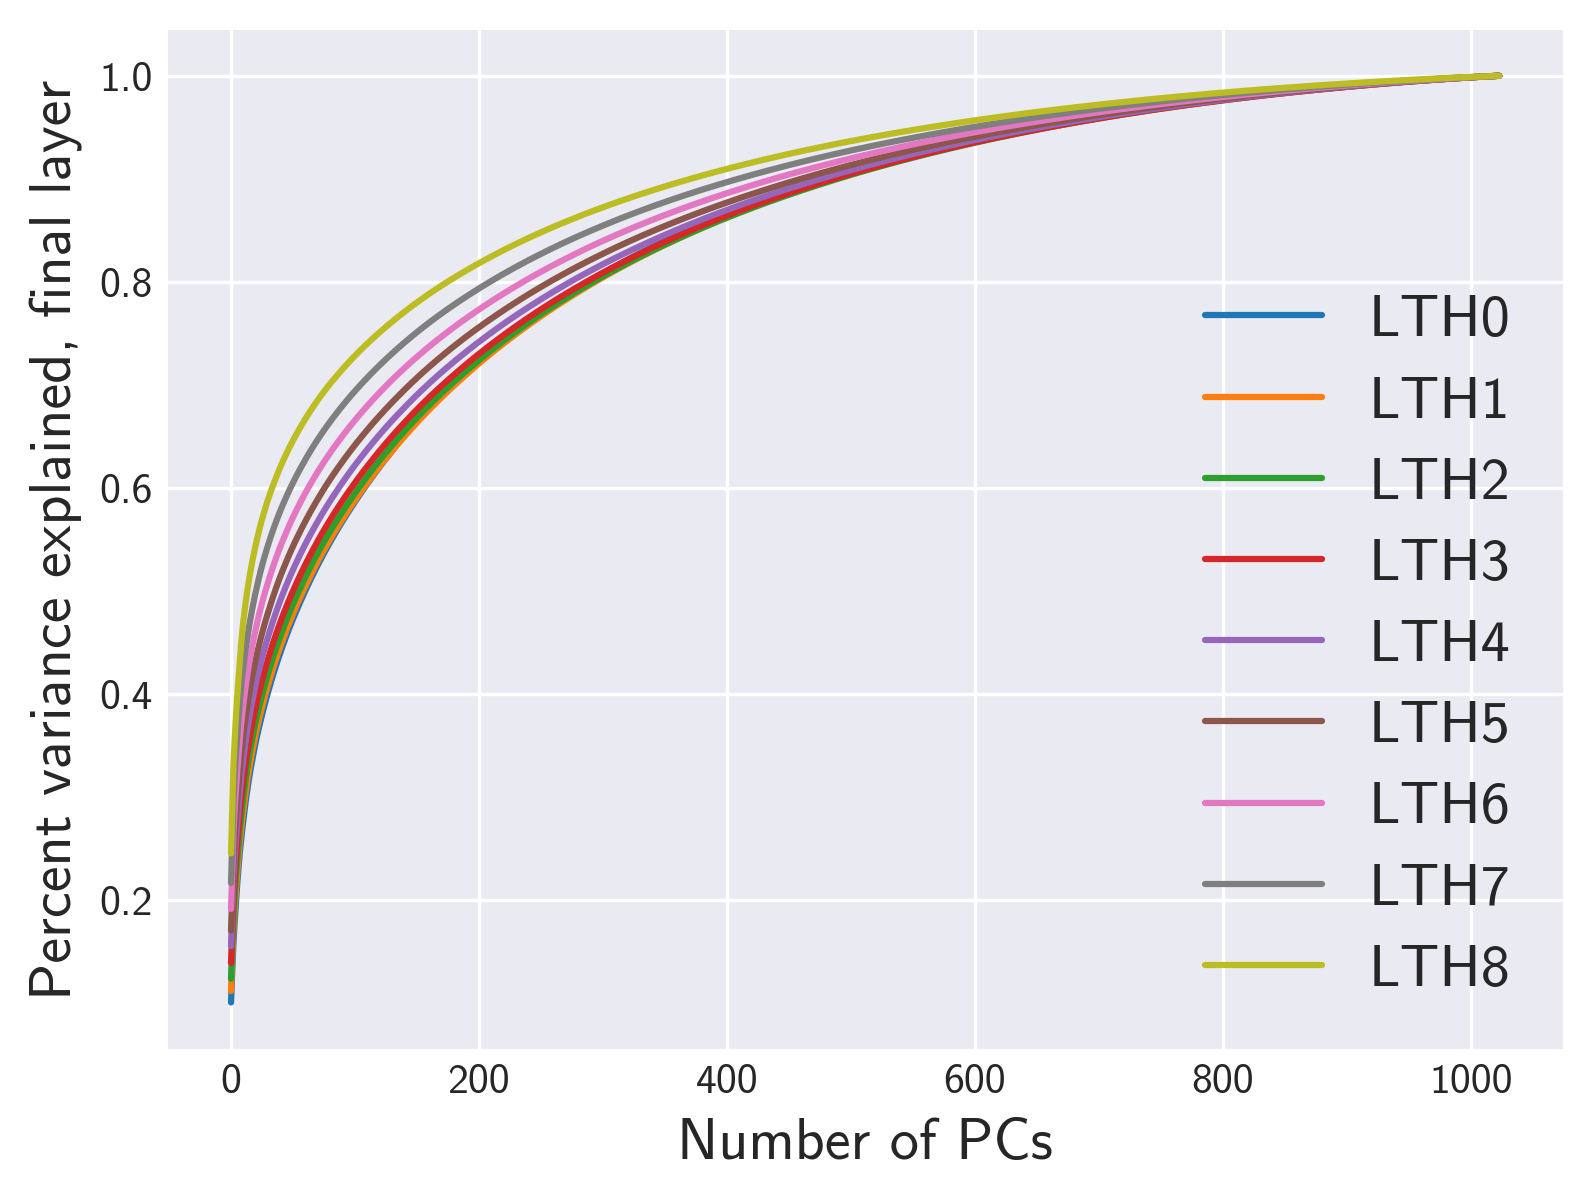

In [246]:
plt.figure(figsize = (6, 4.5), dpi=300)
ax = plt.gca()

n_components = len(model_var_explained['LTH0'])
for model in model_var_explained:
    ax.plot(np.arange(n_components), model_var_explained[model], label=model)
    
plt.xlabel('Number of PCs', fontsize=14)
plt.ylabel('Percent variance explained, final layer', fontsize=14)
plt.legend(fontsize=14)
plt.show()

### Plot neuronsim correlation matrices

In [30]:
%%time
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

from matplotlib.patches import Rectangle
from matplotlib import rcParams
from matplotlib import font_manager
plt.style.use('seaborn-darkgrid')
fpath = '/raj-learn/envs/contextual_repr_analysis/lib/python3.6/site-packages/matplotlib/mpl-data/fonts/ttf/cmss10.ttf'
prop = font_manager.FontProperties(fname=fpath)
rcParams['font.family'] = prop.get_name()
rcParams['mathtext.fontset'] = 'cm'
rcParams['axes.unicode_minus'] = False

CPU times: user 587 µs, sys: 0 ns, total: 587 µs
Wall time: 602 µs


In [6]:
neuronsim = {'maxcorr' : {},
             'maxlinreg' : {}
            }

def fix_layername(layer):
    return layer.split('-')[0] + '-layer' + str(int(layer.split('_')[-1])+1)

for simtype in ['maxcorr', 'maxlinreg']:
    for layer in layer_names:
        neuronsim[simtype][fix_layername(layer)] = {fix_layername(layer) : 1.0}
        similarities = res_dict[simtype]['similarities'][layer]
        for other_layer in similarities:
            neuronsim[simtype][fix_layername(layer)][fix_layername(other_layer)] = similarities[other_layer]

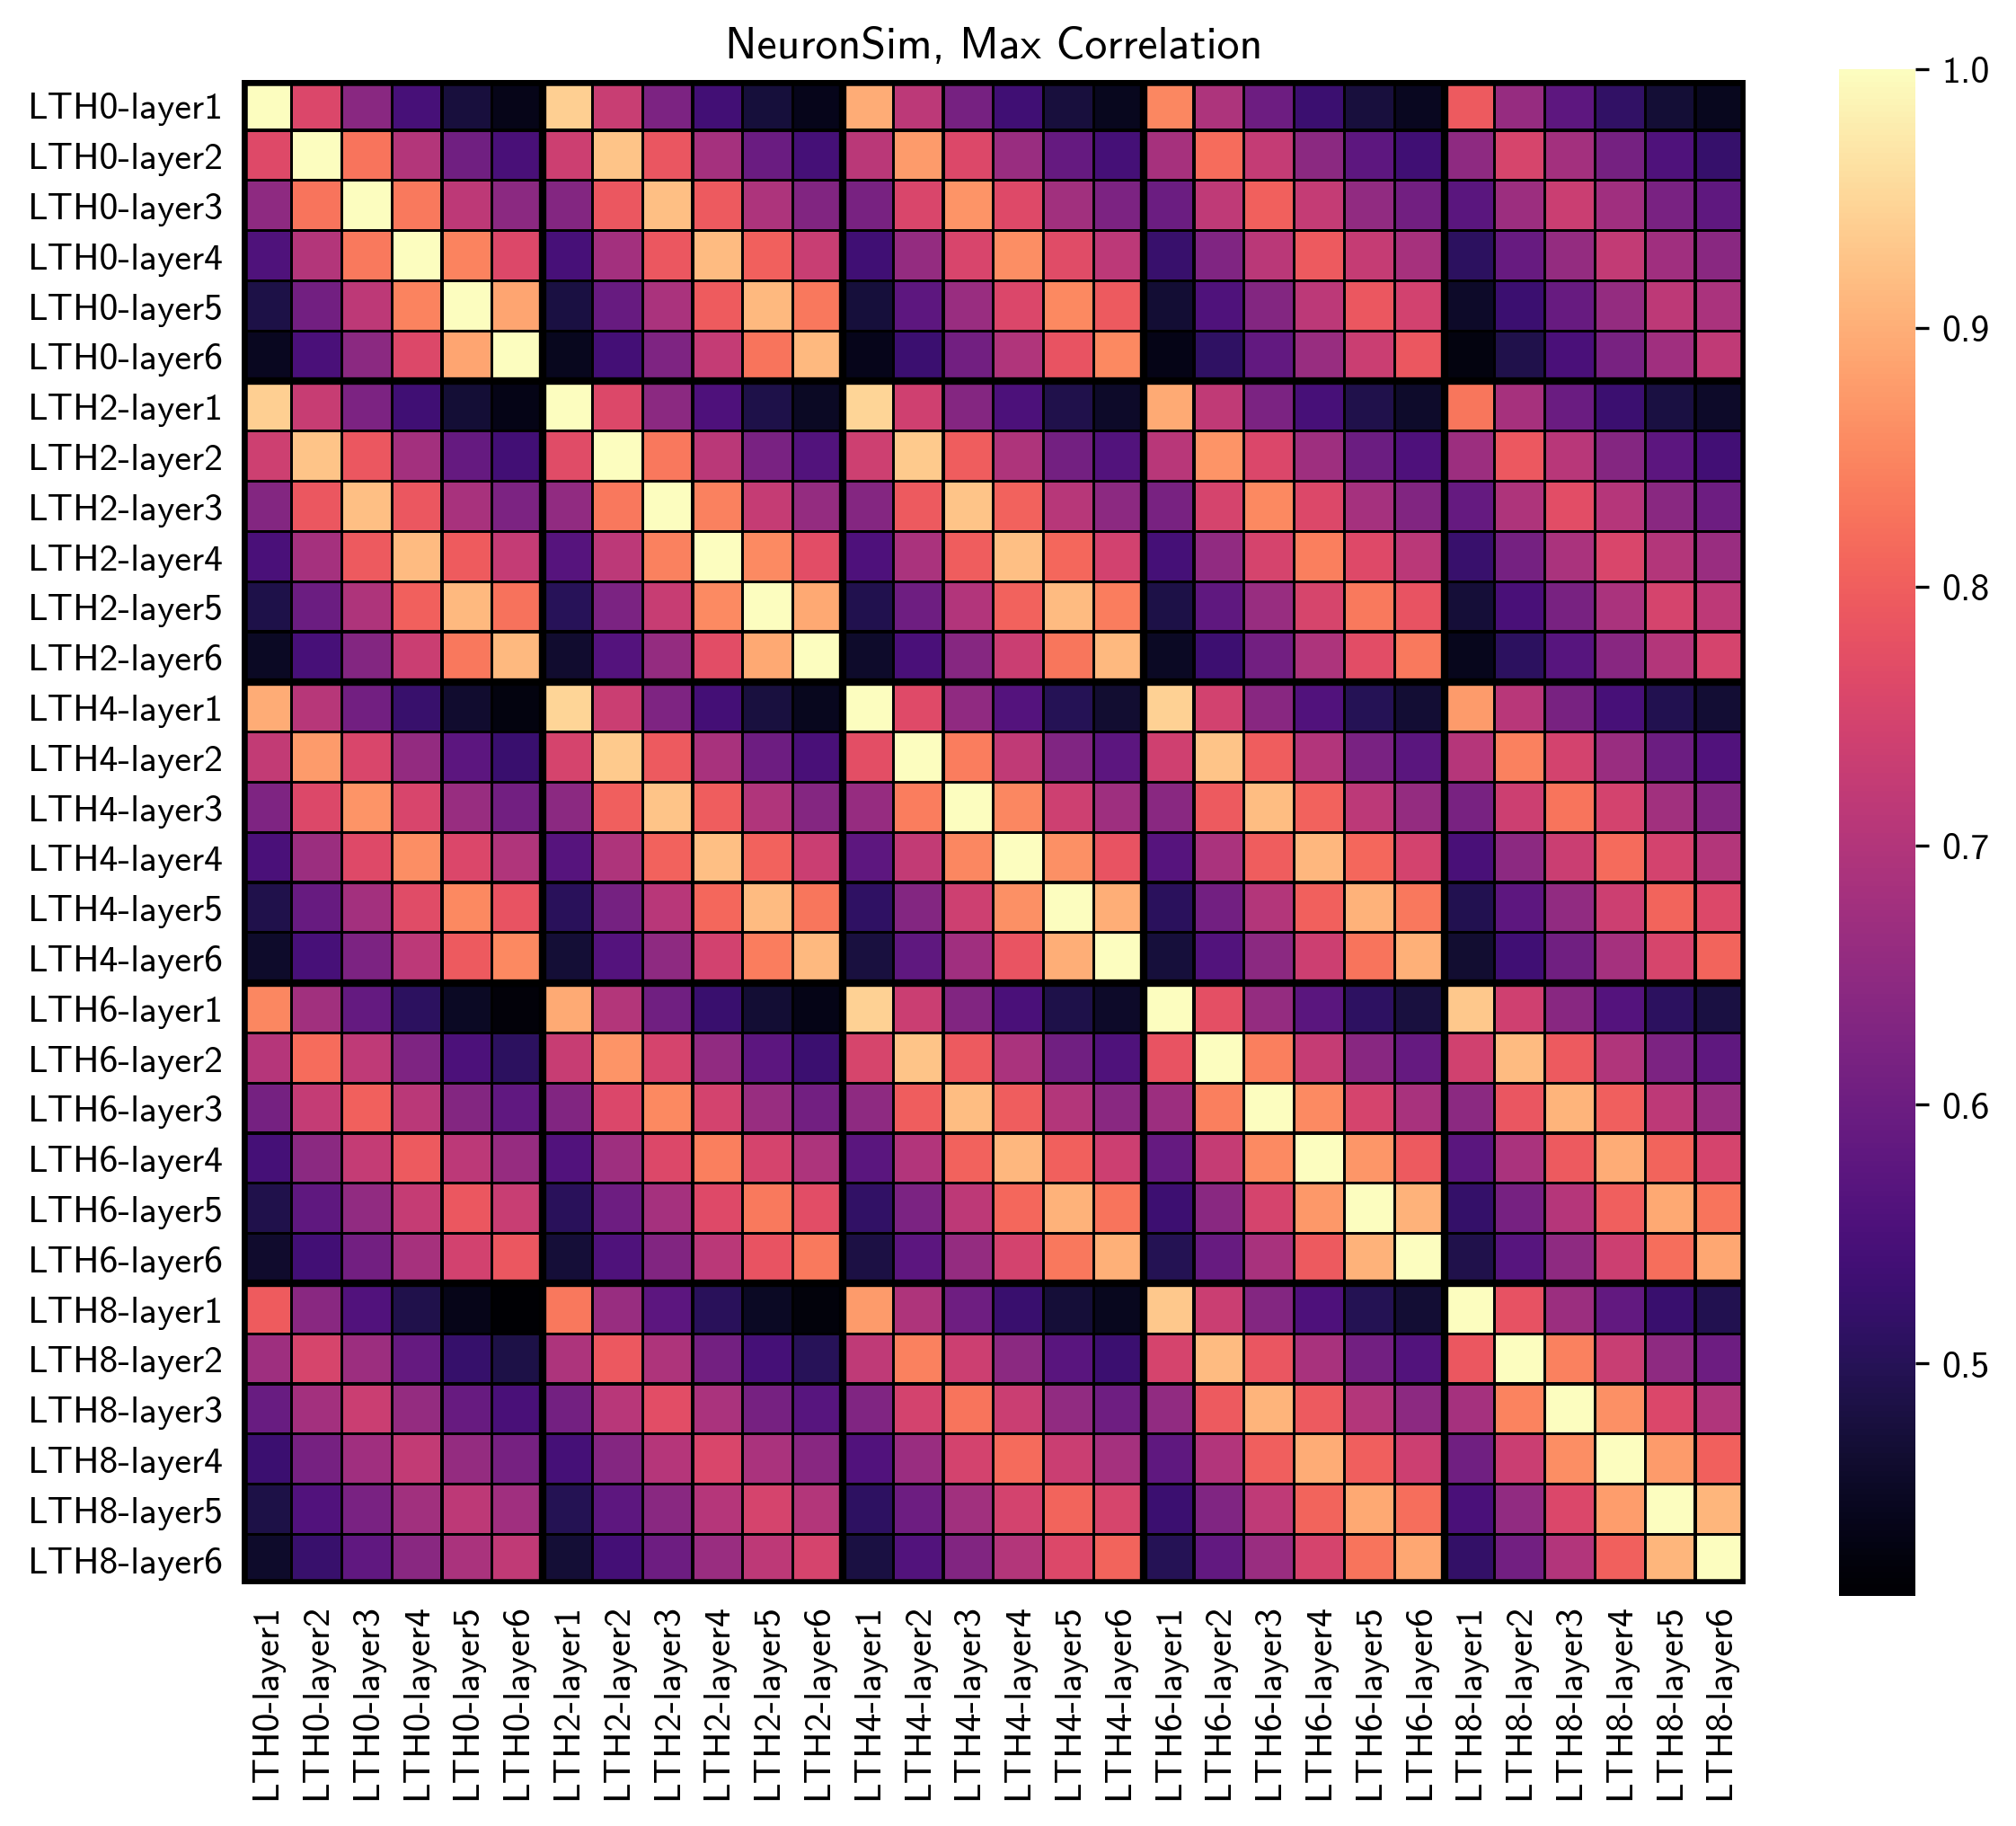

In [11]:
corr_df = pd.DataFrame(neuronsim['maxcorr'])
use_models = ['LTH0', 'LTH2', 'LTH4', 'LTH6', 'LTH8']
use_cols = [col.split('-')[0] in use_models for col in  corr_df.columns]
corr_df = corr_df.iloc[use_cols, use_cols]

plt.figure(figsize = (9, 7.5), dpi=300)
ax = sns.heatmap(corr_df, cmap='magma', lw=0.5, linecolor='k', square=True)
for x in range(0, len(corr_df.columns)+6, 6):
    ax.axvline(x, lw=2, color='k')
    ax.axhline(x, lw=2, color='k')
ax.add_patch(Rectangle((0, 0), len(corr_df.columns), len(corr_df.index), fill=False, edgecolor='black', lw=3))
ax.tick_params(axis='both', which='both', length=0, pad=5)
ax.set_title("NeuronSim, Max Correlation")
plt.show()

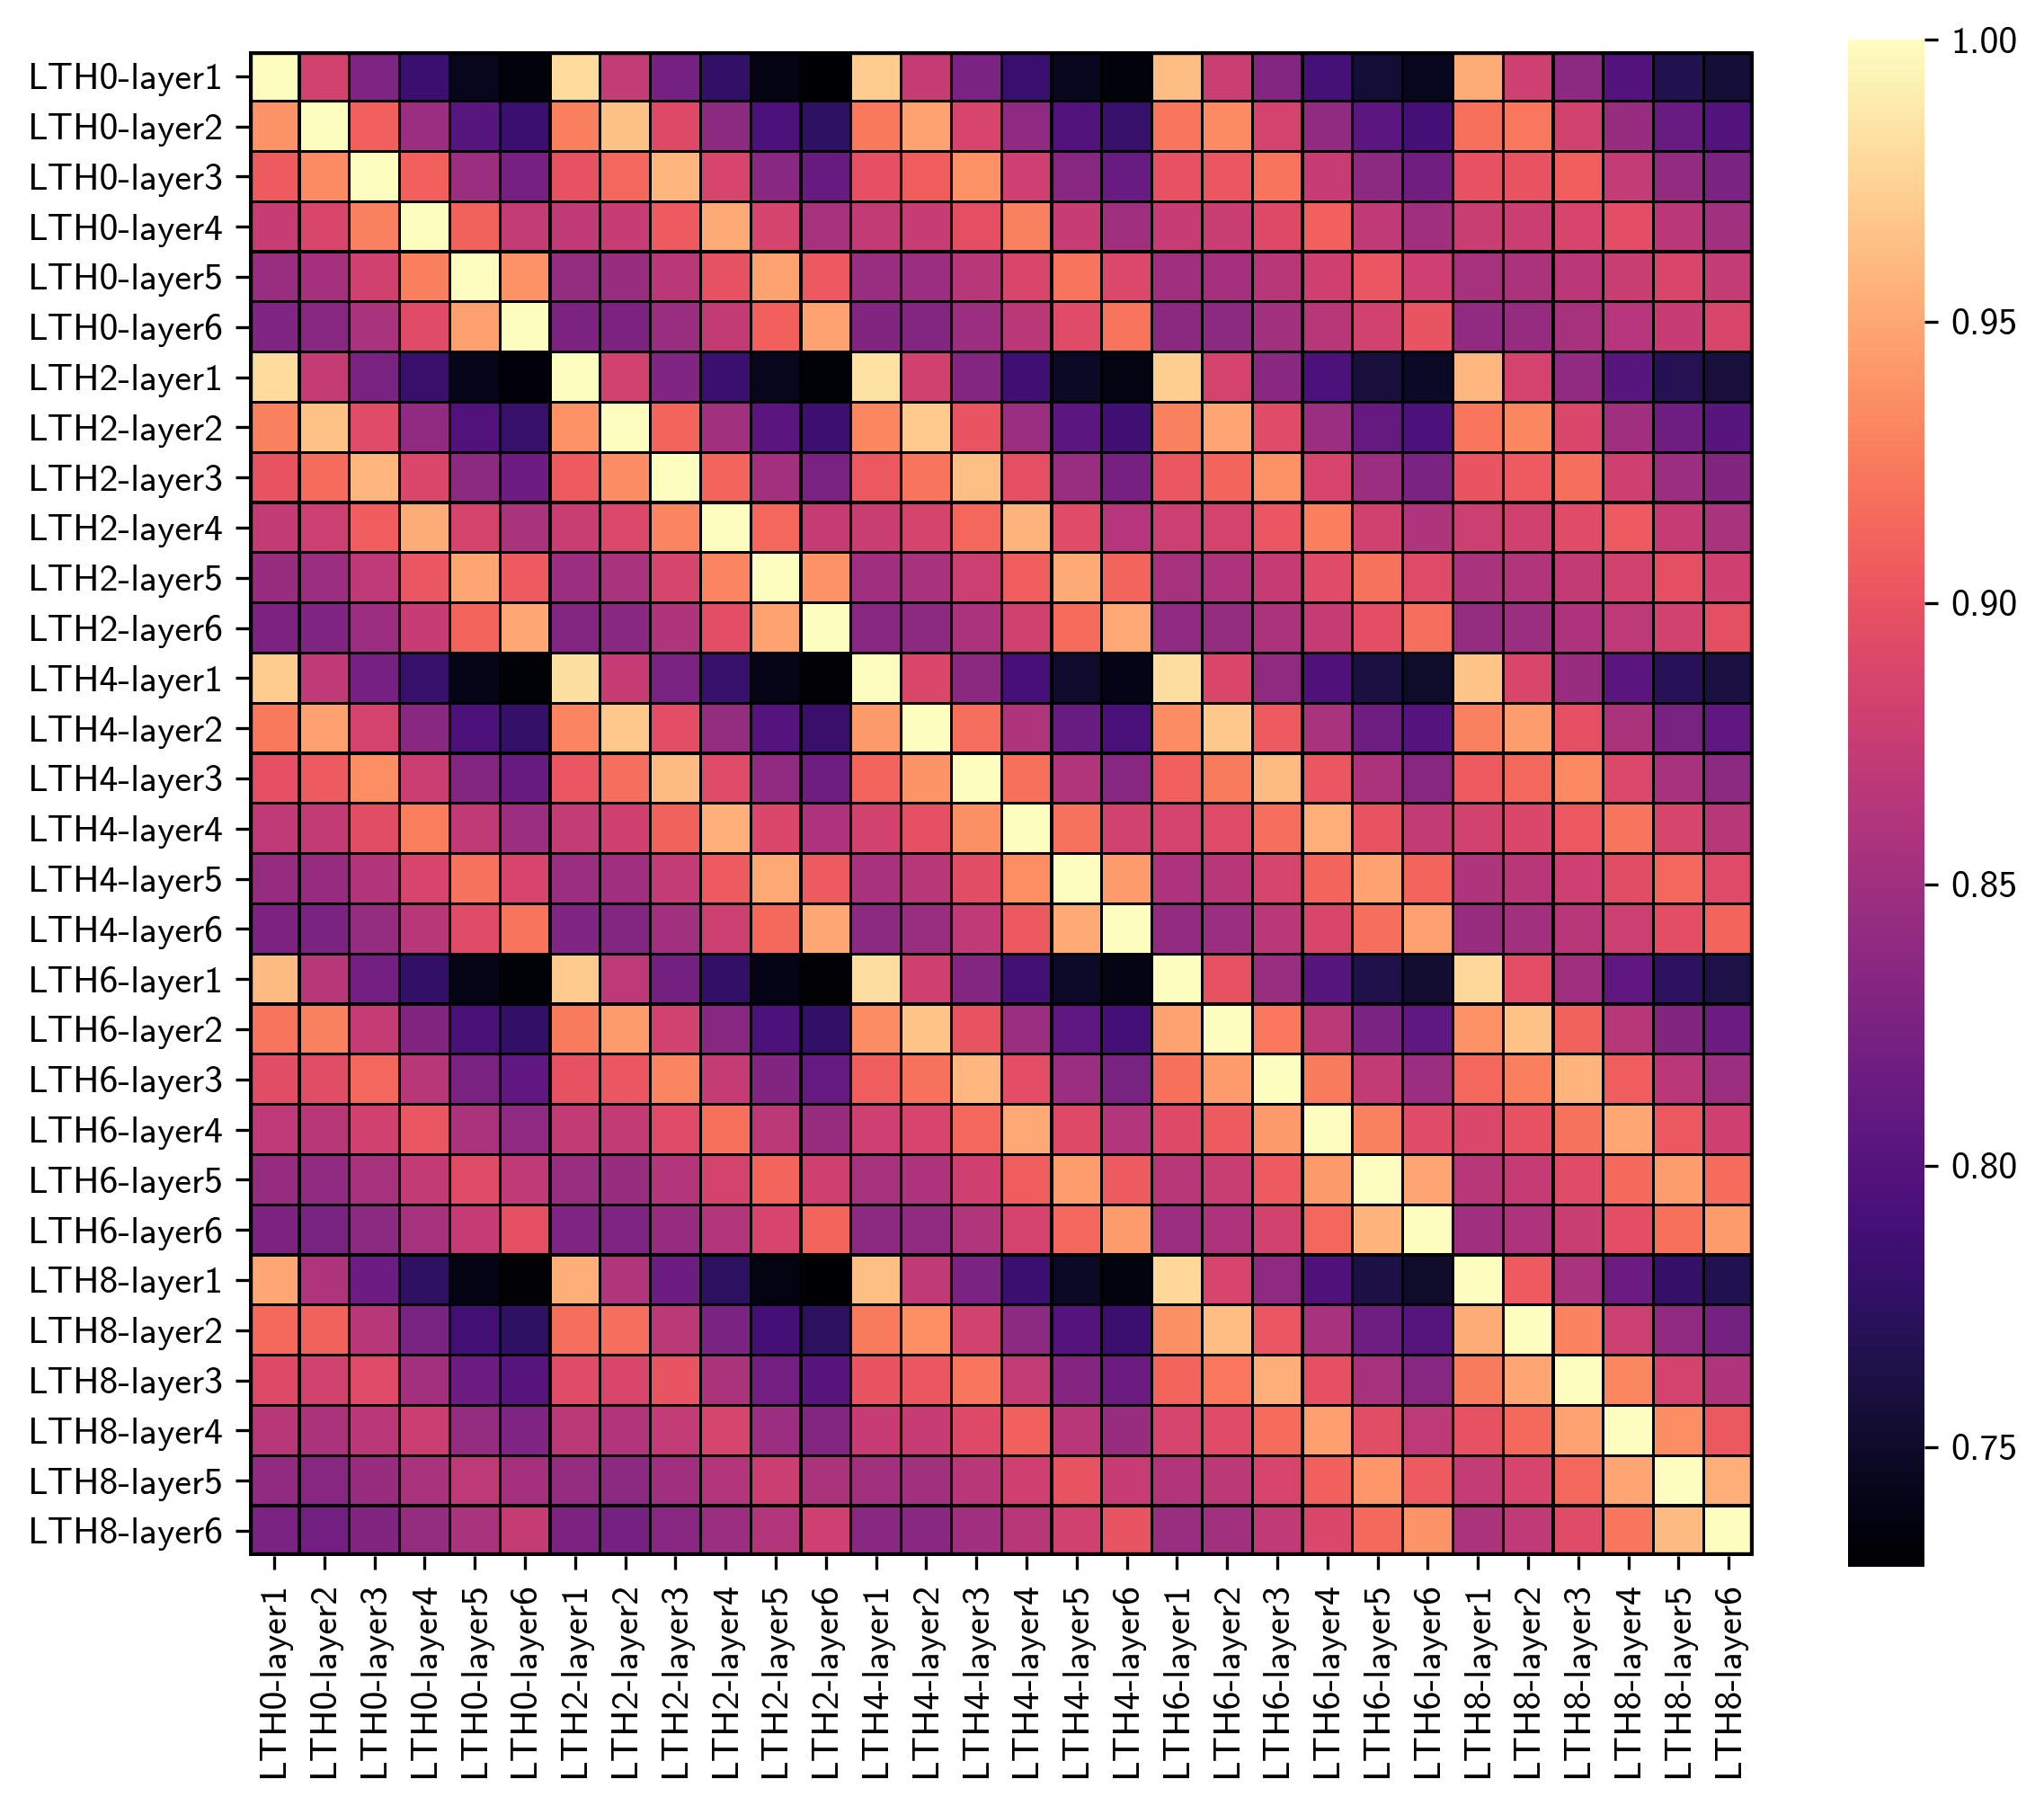

In [18]:
linreg_df = pd.DataFrame(neuronsim['maxlinreg'])
use_models = ['LTH0', 'LTH2', 'LTH4', 'LTH6', 'LTH8']
use_cols = [col.split('-')[0] in use_models for col in  linreg_df.columns]
linreg_df = linreg_df.iloc[use_cols, use_cols]

plt.figure(figsize = (9, 7.5), dpi=300)
ax = sns.heatmap(linreg_df, cmap='magma', lw=0.5, linecolor='k', square=True)
ax.add_patch(Rectangle((0, 0), len(linreg_df.columns), len(linreg_df.index), fill=False, edgecolor='black', lw=2))
plt.show()

In [251]:
layer_corrs_with_unpruned = {layer : [] for layer in ['layer' + str(i) for i in range(1, 7)]}
for layer in layer_corrs_with_unpruned:
    cur_layer = f'LTH0-{layer}'
    for lth_iter in range(model_count):
        layer_corrs_with_unpruned[layer].append(neuronsim['maxcorr'][cur_layer][f'LTH{lth_iter}-{layer}'])

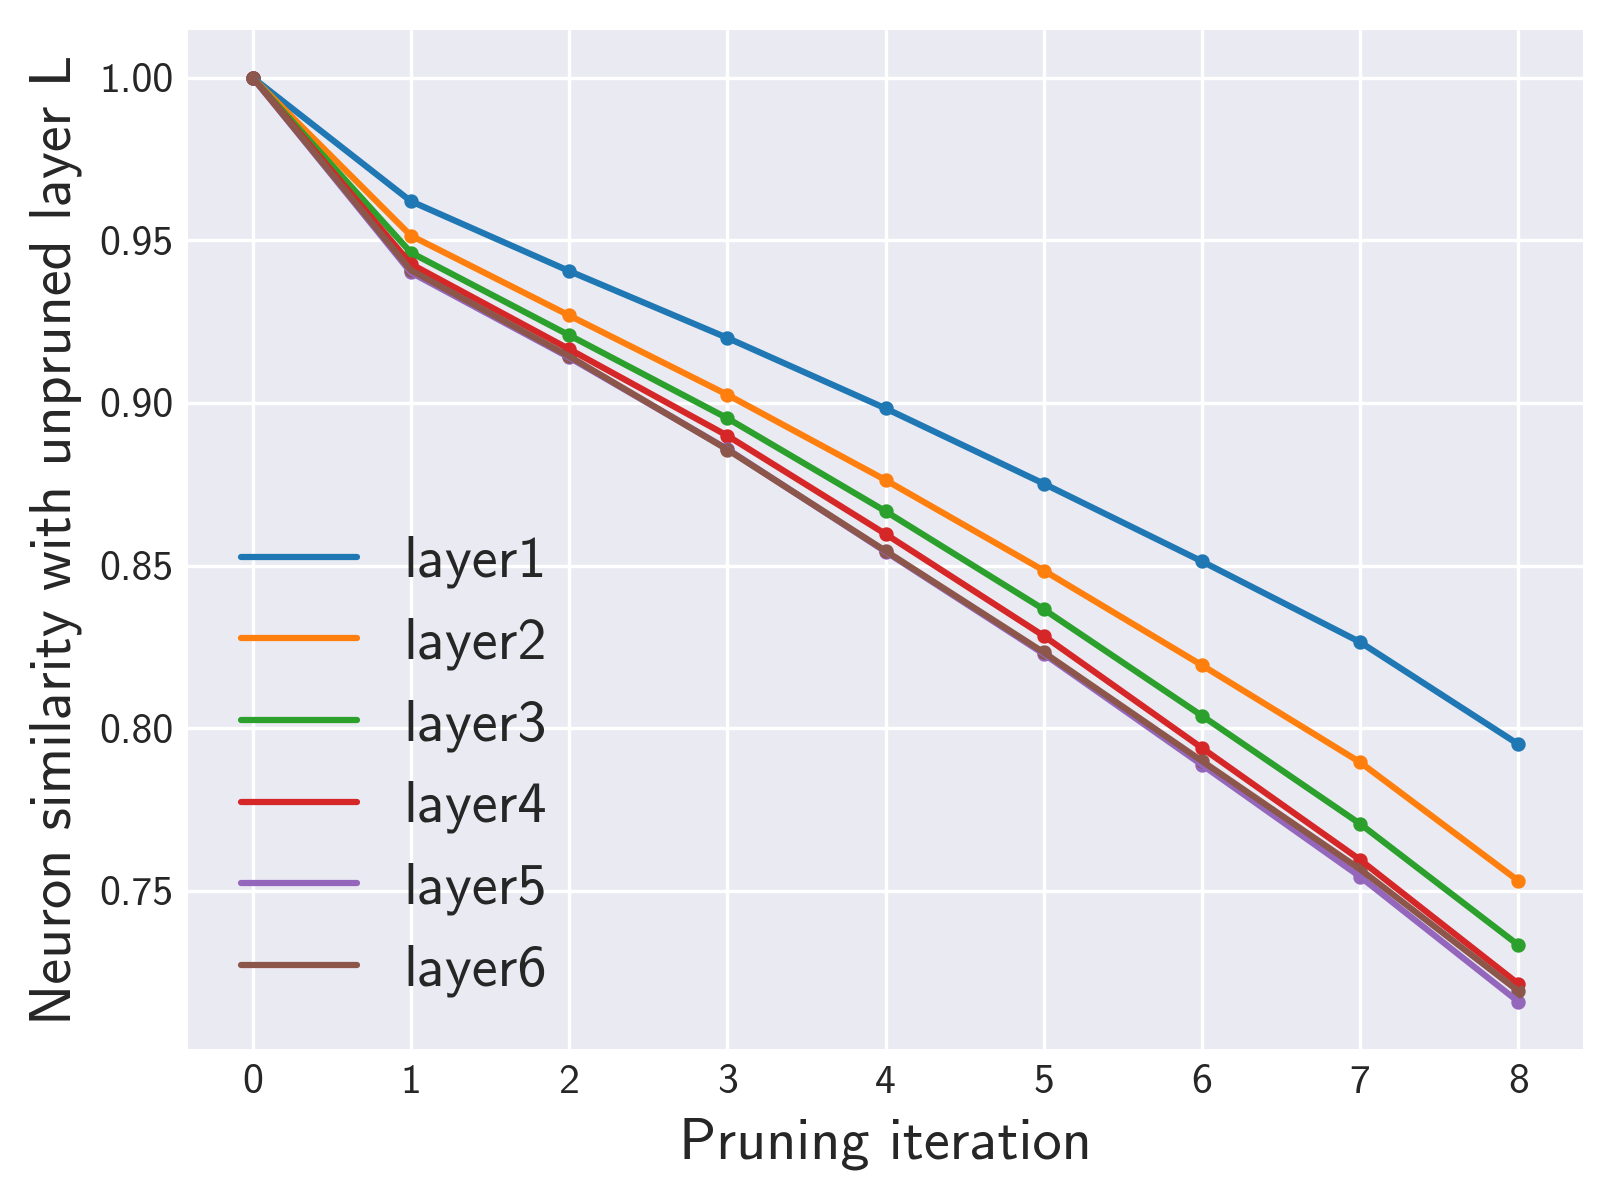

In [252]:
plt.figure(figsize = (6, 4.5), dpi=300)
ax = plt.gca()
x = range(model_count)

for layer in layer_corrs_with_unpruned:
    ax.plot(x, layer_corrs_with_unpruned[layer], label=layer)
    ax.scatter(x, layer_corrs_with_unpruned[layer], s=6)
    
plt.xlabel('Pruning iteration', fontsize=14)
plt.ylabel('Neuron similarity with unpruned layer L', fontsize=14)
plt.legend(fontsize=14)
plt.show()

We know that higher layers tend to be more model-specific. These results seem to further indicate that as sparsity increases, higher layers are even more model-specific.

## Analyze representation-level similarity between layers

In [19]:
res_dict["cca"] = pickle.load(open(res_fname["cca"], "rb"))
res_dict["lincka"] = pickle.load(open(res_fname["lincka"], "rb"))

In [23]:
layersim = {'lincka' : {},
            'svcca' : {},
            'pwcca' : {}
            }

def fix_layername(layer):
    return layer.split('-')[0] + '-layer' + str(int(layer.split('_')[-1])+1)

for simtype in layersim.keys():
    for layer in layer_names:
        layersim[simtype][fix_layername(layer)] = {fix_layername(layer) : 1.0}
        if simtype == 'lincka':
            similarities = res_dict[simtype]['similarities'][layer]
        elif simtype == 'svcca':
            similarities = res_dict['cca']['sv_similarities'][layer]
        if simtype == 'pwcca':
            similarities = res_dict['cca']['pw_similarities'][layer]
        for other_layer in similarities:
            layersim[simtype][fix_layername(layer)][fix_layername(other_layer)] = similarities[other_layer]

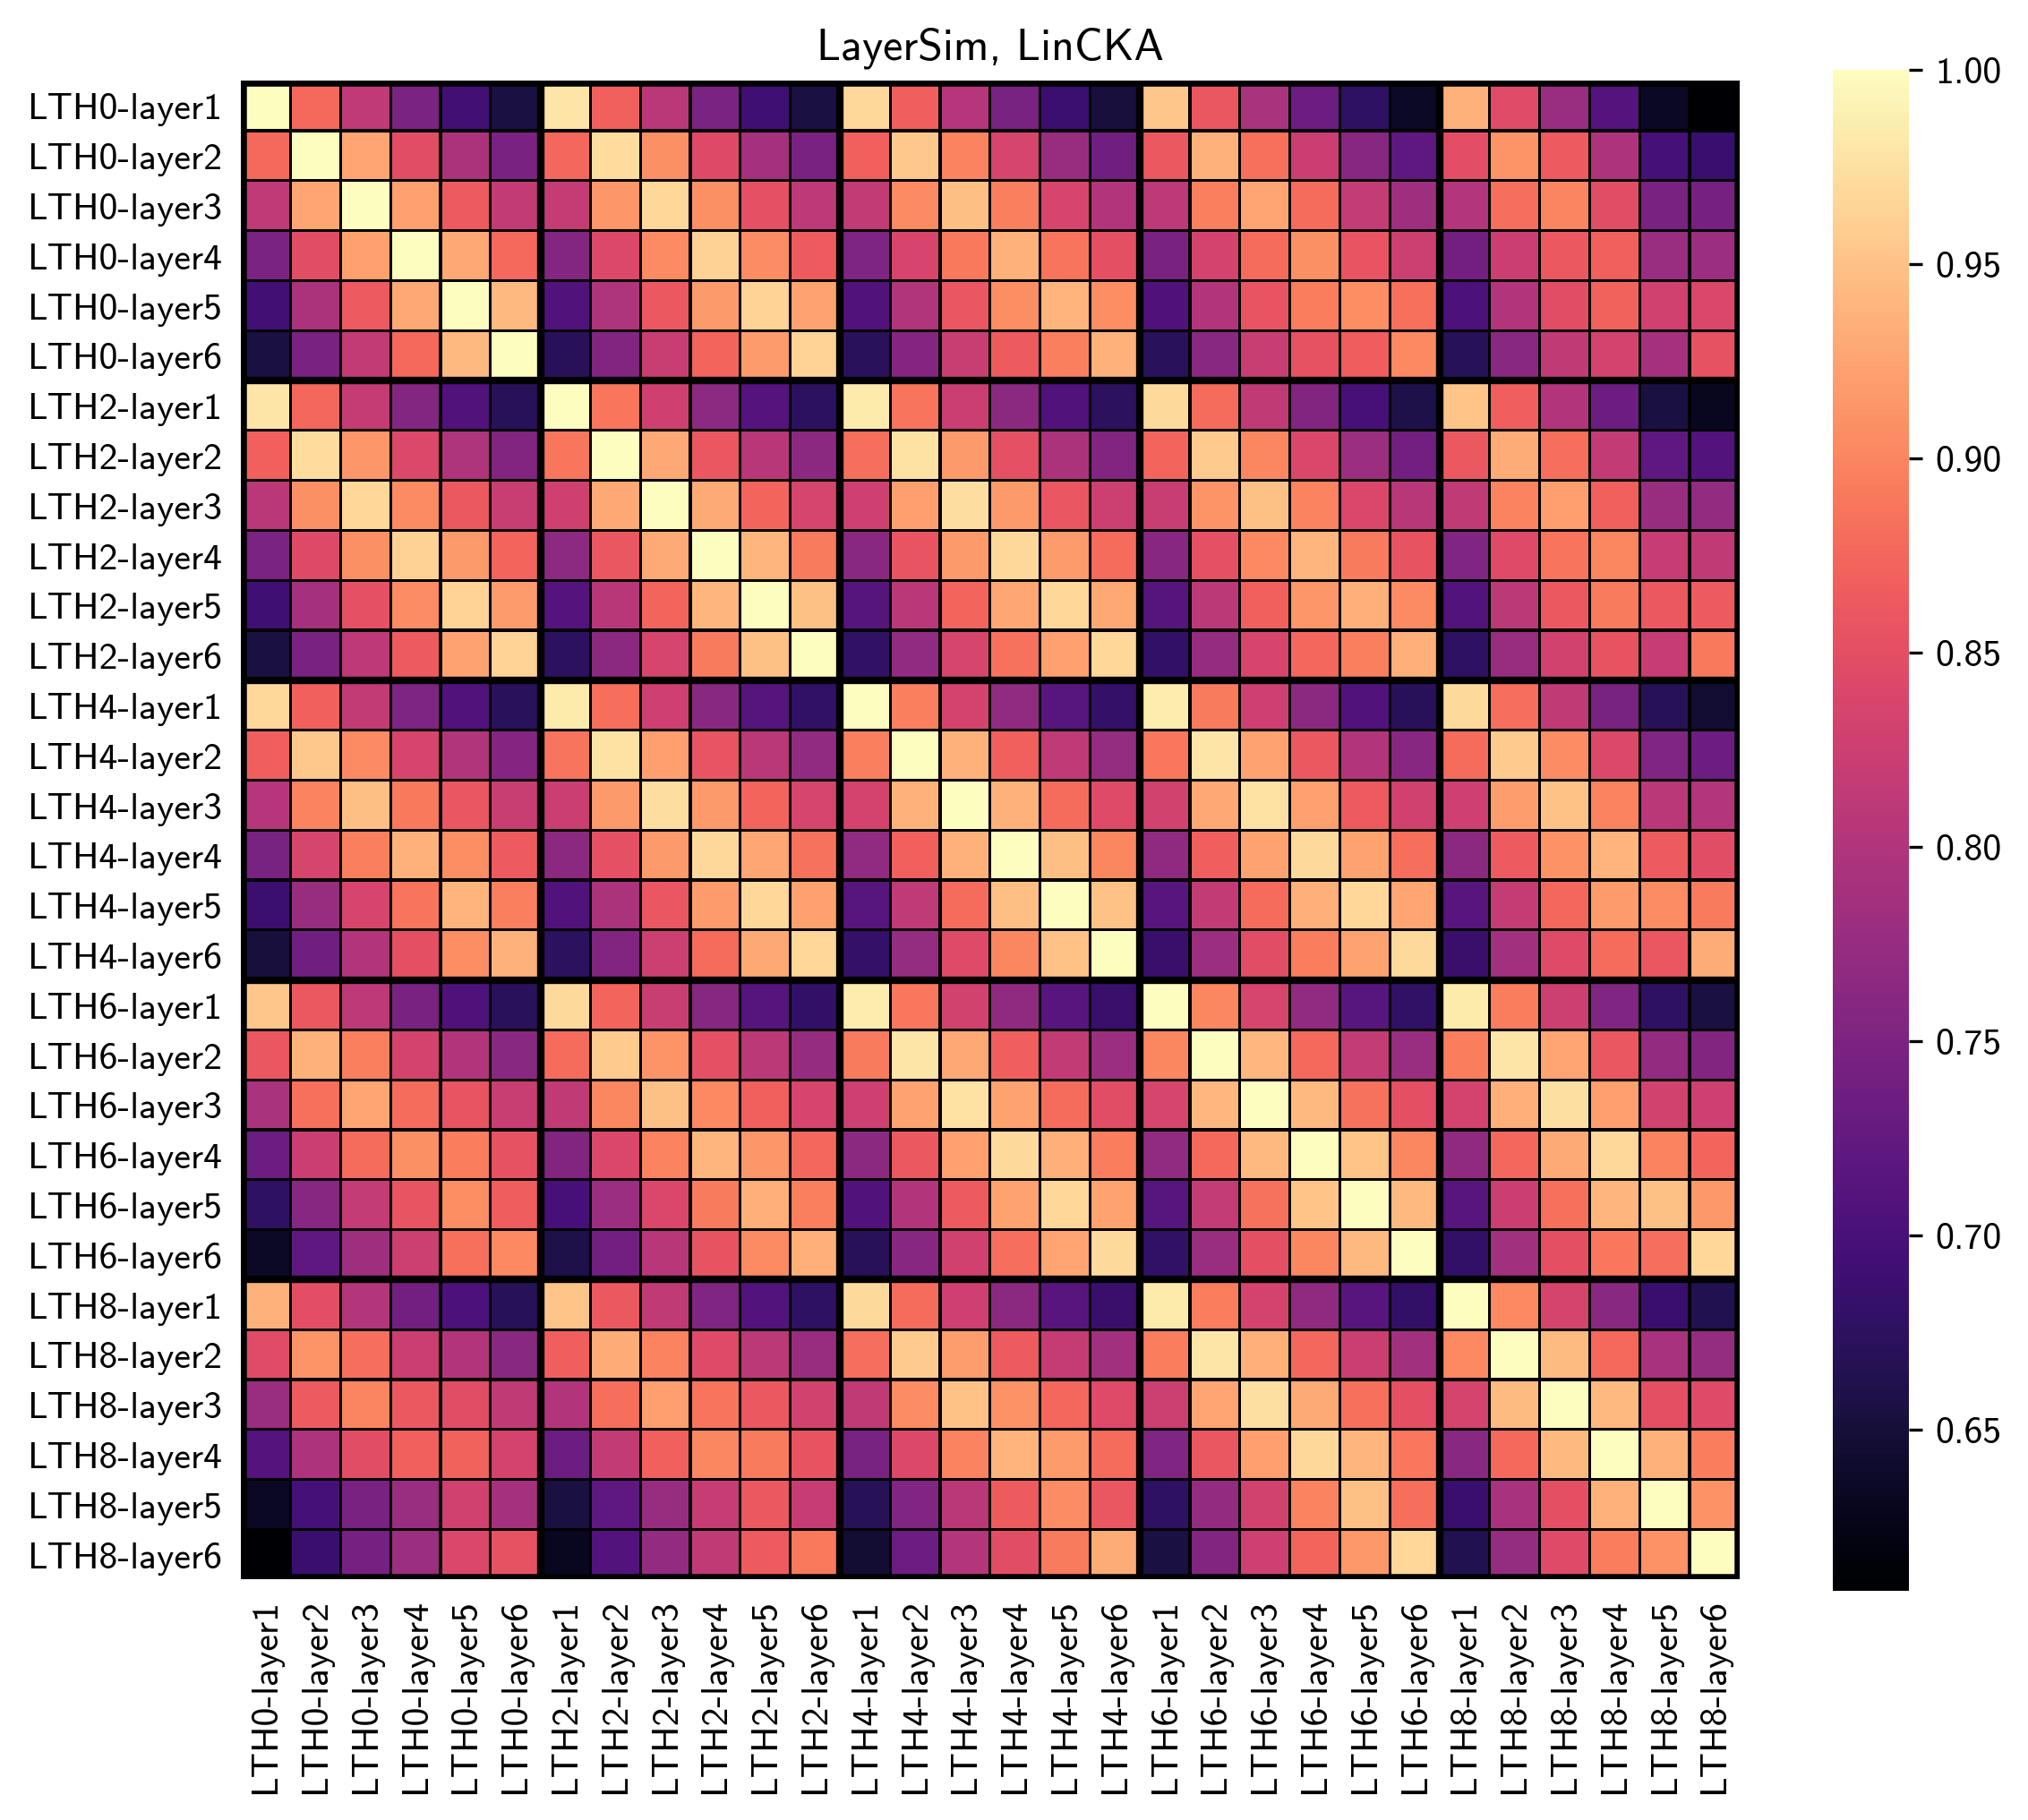

In [24]:
corr_df = pd.DataFrame(layersim['lincka'])
use_models = ['LTH0', 'LTH2', 'LTH4', 'LTH6', 'LTH8']
use_cols = [col.split('-')[0] in use_models for col in  corr_df.columns]
corr_df = corr_df.iloc[use_cols, use_cols]

plt.figure(figsize = (9, 7.5), dpi=300)
ax = sns.heatmap(corr_df, cmap='magma', lw=0.5, linecolor='k', square=True)
for x in range(0, len(corr_df.columns)+6, 6):
    ax.axvline(x, lw=2, color='k')
    ax.axhline(x, lw=2, color='k')
ax.add_patch(Rectangle((0, 0), len(corr_df.columns), len(corr_df.index), fill=False, edgecolor='black', lw=3))
ax.tick_params(axis='both', which='both', length=0, pad=5)
ax.set_title("LayerSim, LinCKA")
plt.show()

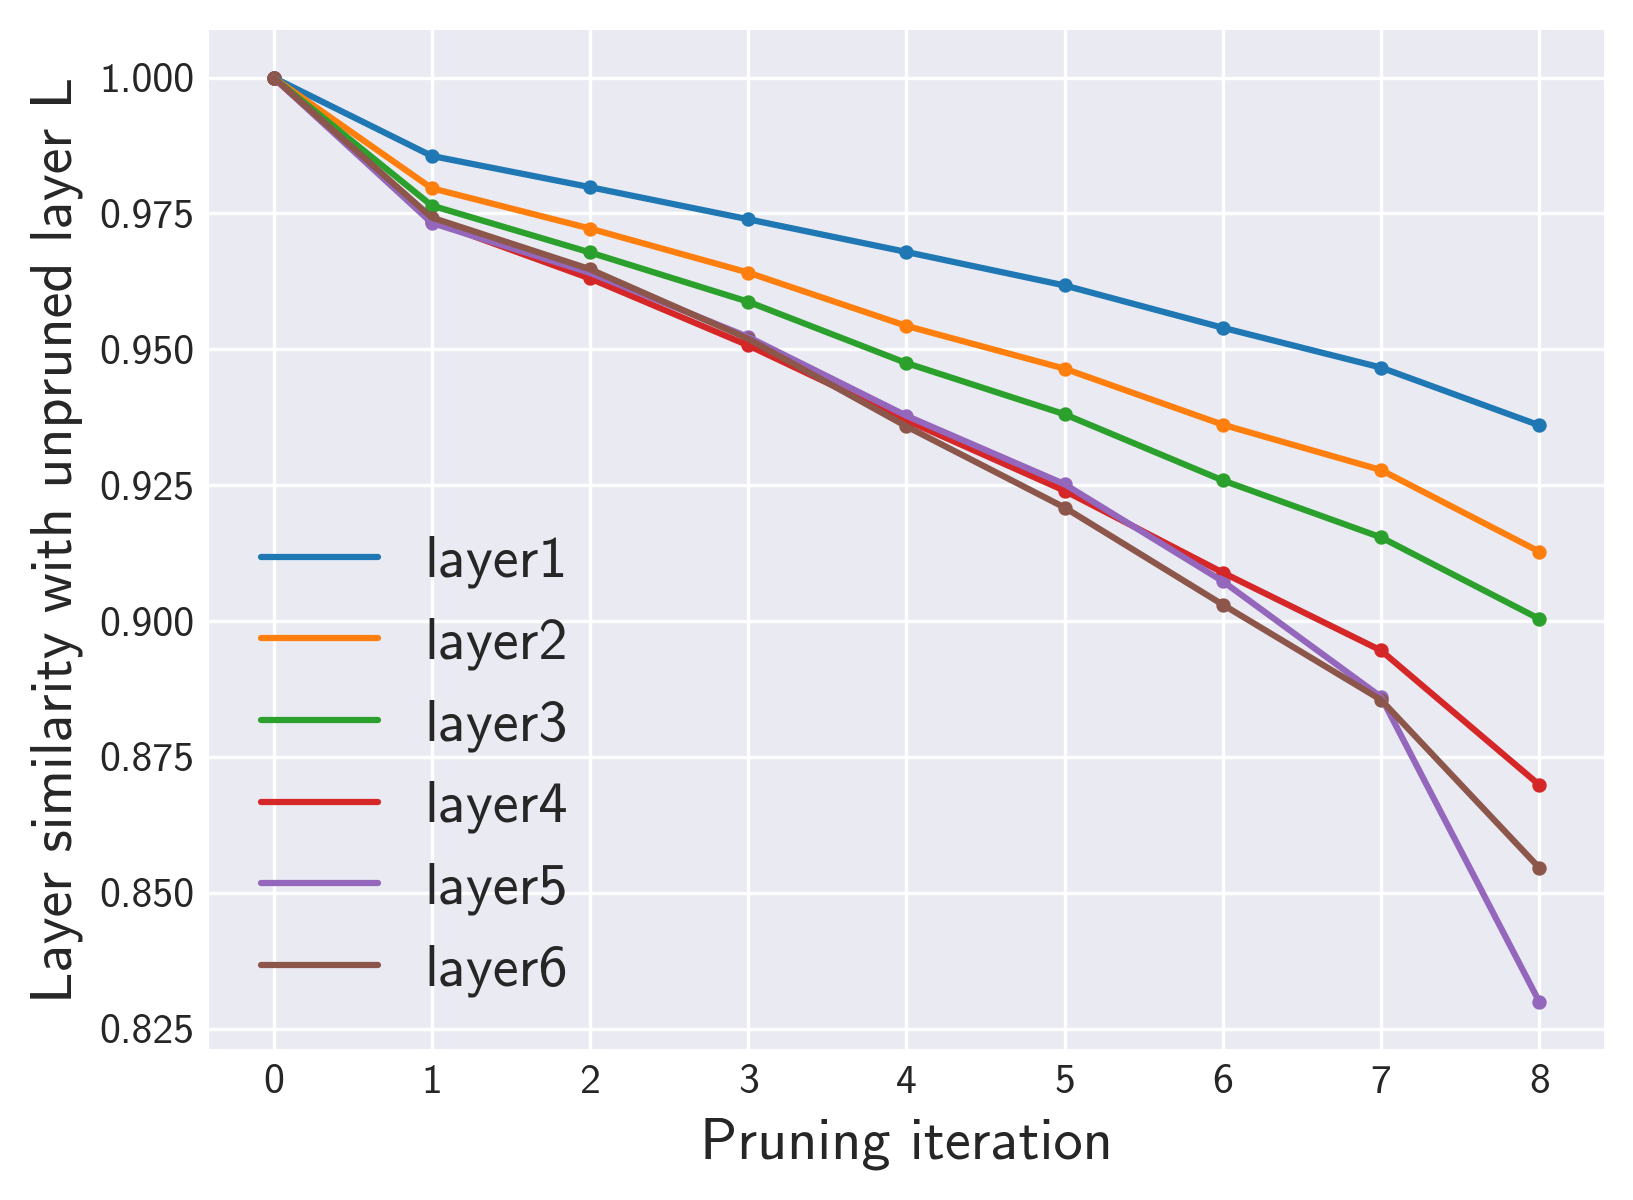

In [31]:
layer_corrs_with_unpruned = {layer : [] for layer in ['layer' + str(i) for i in range(1, 7)]}
for layer in layer_corrs_with_unpruned:
    cur_layer = f'LTH0-{layer}'
    for lth_iter in range(model_count):
        layer_corrs_with_unpruned[layer].append(layersim['lincka'][cur_layer][f'LTH{lth_iter}-{layer}'])
        
plt.figure(figsize = (6, 4.5), dpi=300)
ax = plt.gca()
x = range(model_count)

for layer in layer_corrs_with_unpruned:
    ax.plot(x, layer_corrs_with_unpruned[layer], label=layer)
    ax.scatter(x, layer_corrs_with_unpruned[layer], s=6)
    
plt.xlabel('Pruning iteration', fontsize=14)
plt.ylabel('Layer similarity with unpruned layer L', fontsize=14)
plt.legend(fontsize=14)
plt.show()

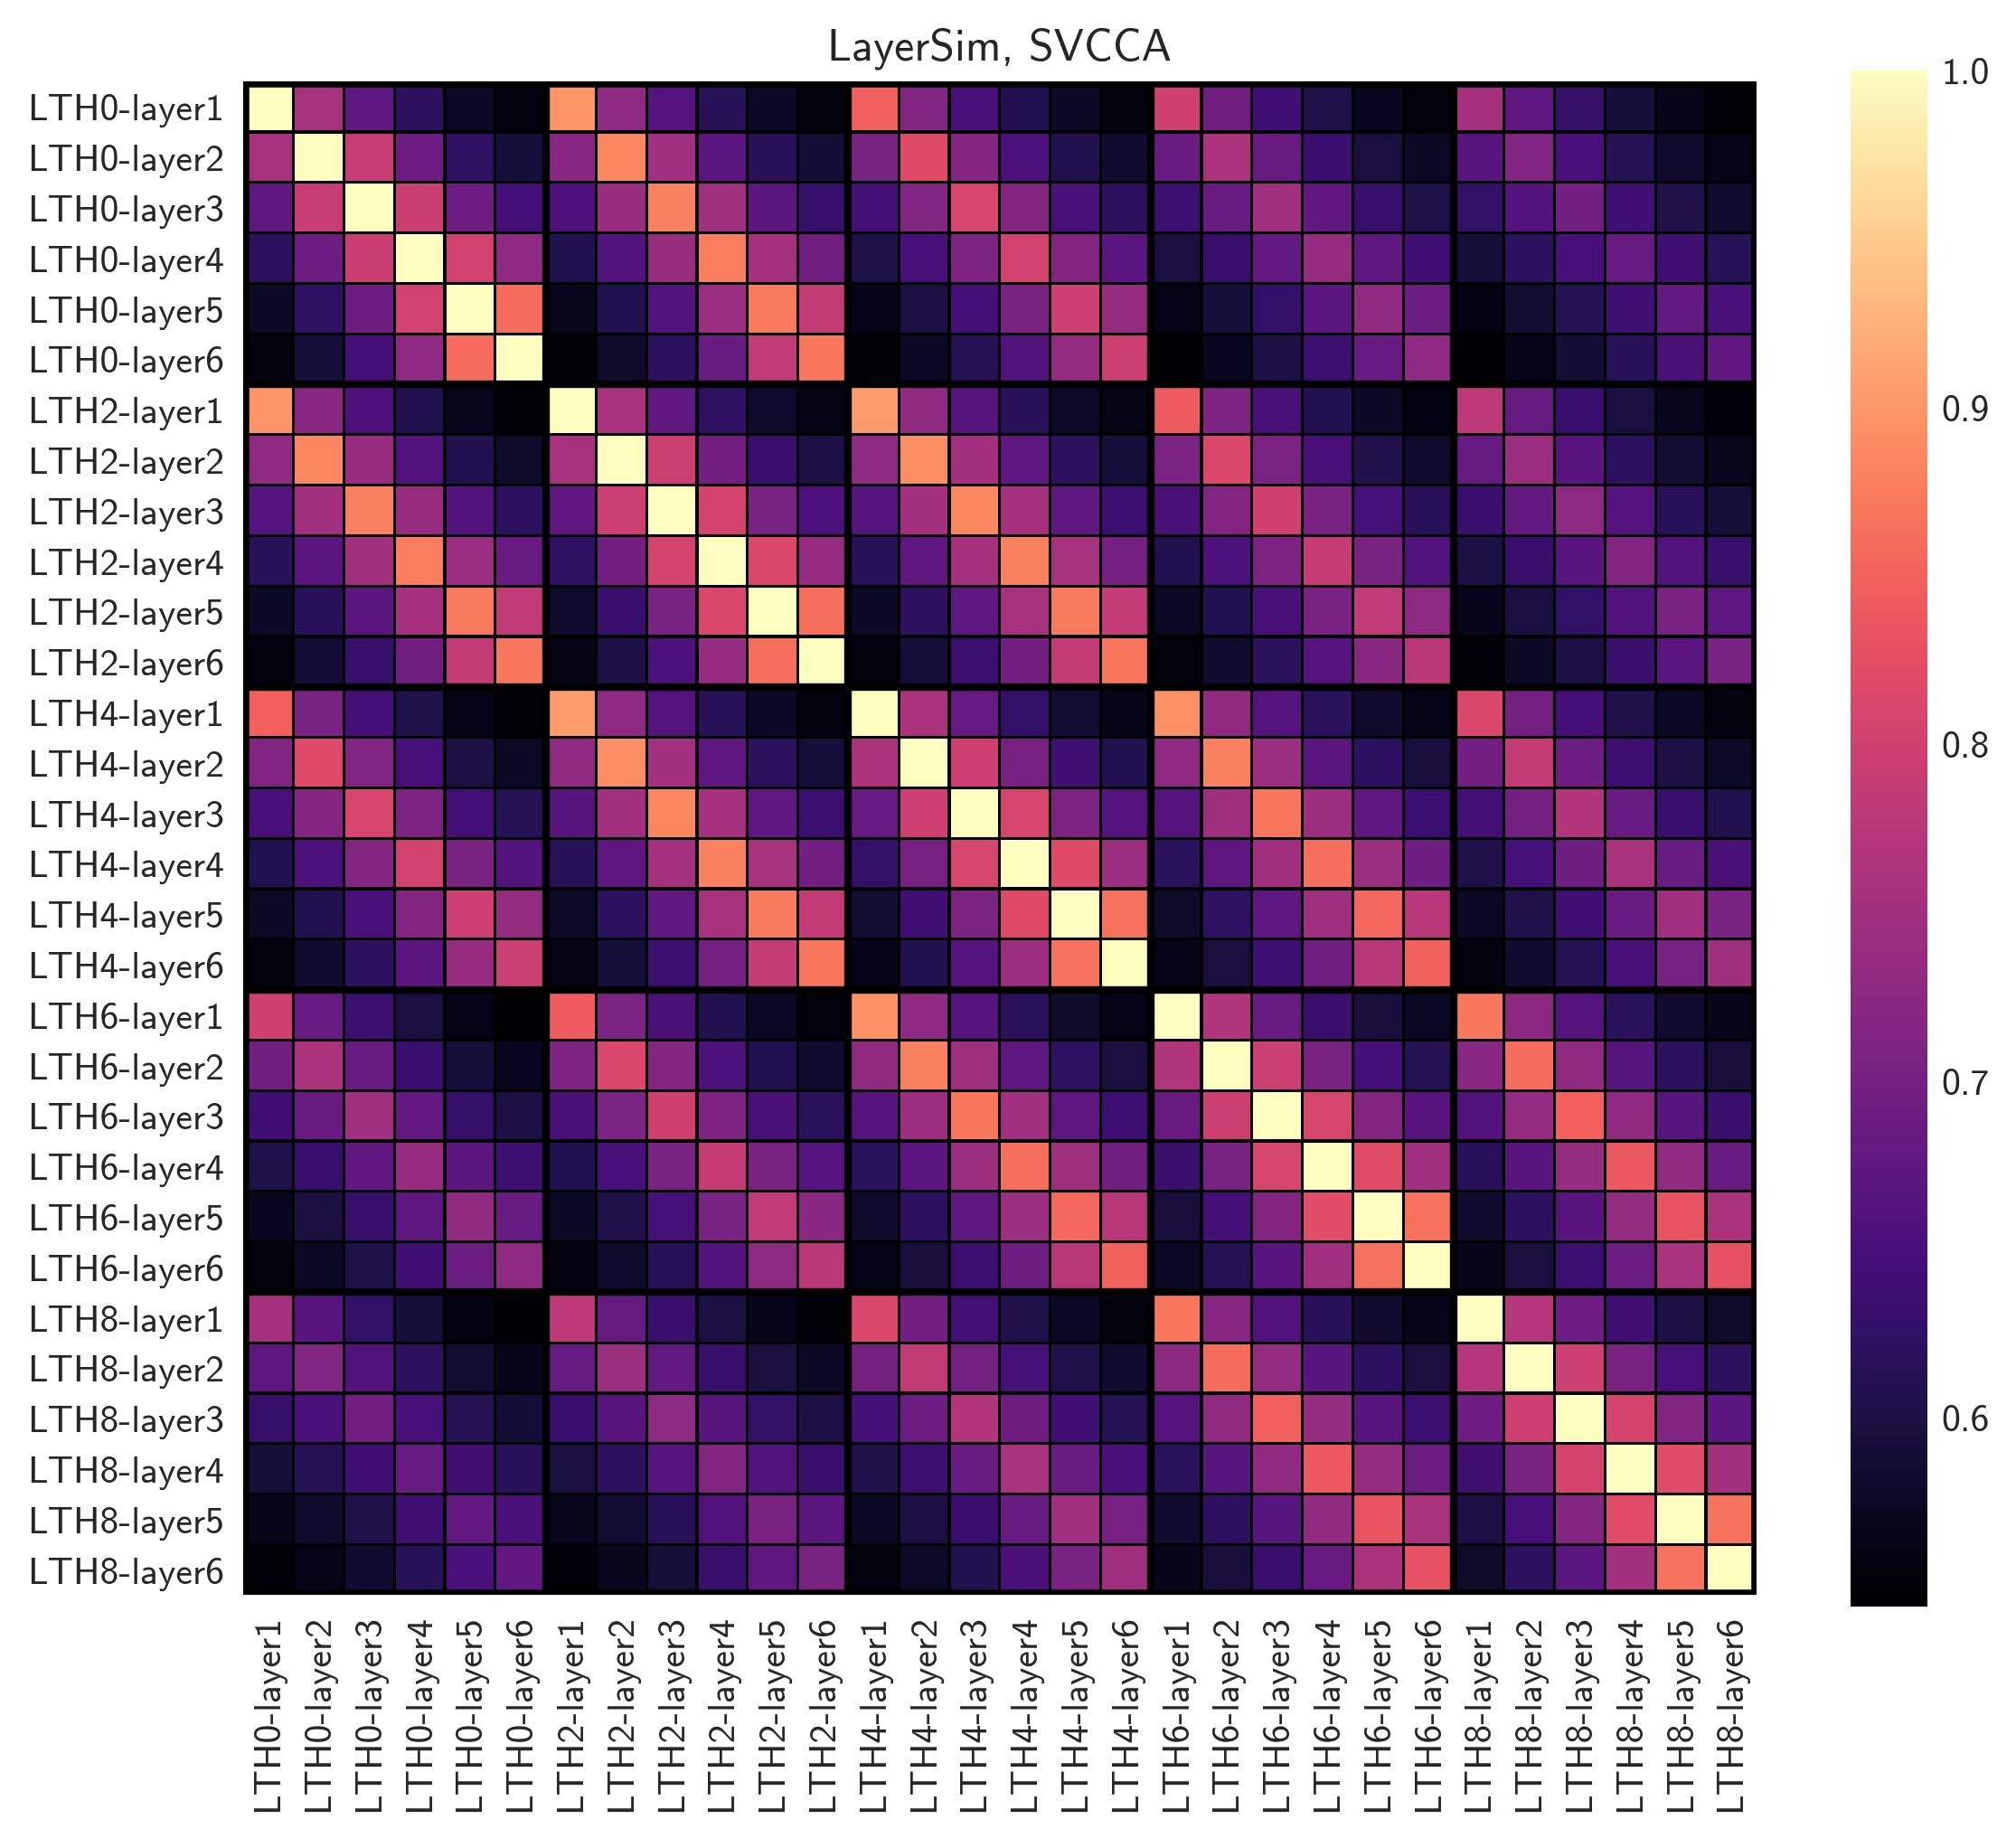

In [34]:
corr_df = pd.DataFrame(layersim['svcca'])
use_models = ['LTH0', 'LTH2', 'LTH4', 'LTH6', 'LTH8']
use_cols = [col.split('-')[0] in use_models for col in  corr_df.columns]
corr_df = corr_df.iloc[use_cols, use_cols]

plt.figure(figsize = (9, 7.5), dpi=300)
ax = sns.heatmap(corr_df, cmap='magma', lw=0.5, linecolor='k', square=True)
for x in range(0, len(corr_df.columns)+6, 6):
    ax.axvline(x, lw=2, color='k')
    ax.axhline(x, lw=2, color='k')
ax.add_patch(Rectangle((0, 0), len(corr_df.columns), len(corr_df.index), fill=False, edgecolor='black', lw=3))
ax.tick_params(axis='both', which='both', length=0, pad=5)
ax.set_title("LayerSim, SVCCA")
plt.show()

### Localization score

In [64]:
neuron_corr_df = pd.DataFrame(neuronsim['maxcorr'])
layer_corr_df = pd.DataFrame(layersim['svcca'])

localization_score = neuron_corr_df.mean() - layer_corr_df.mean()

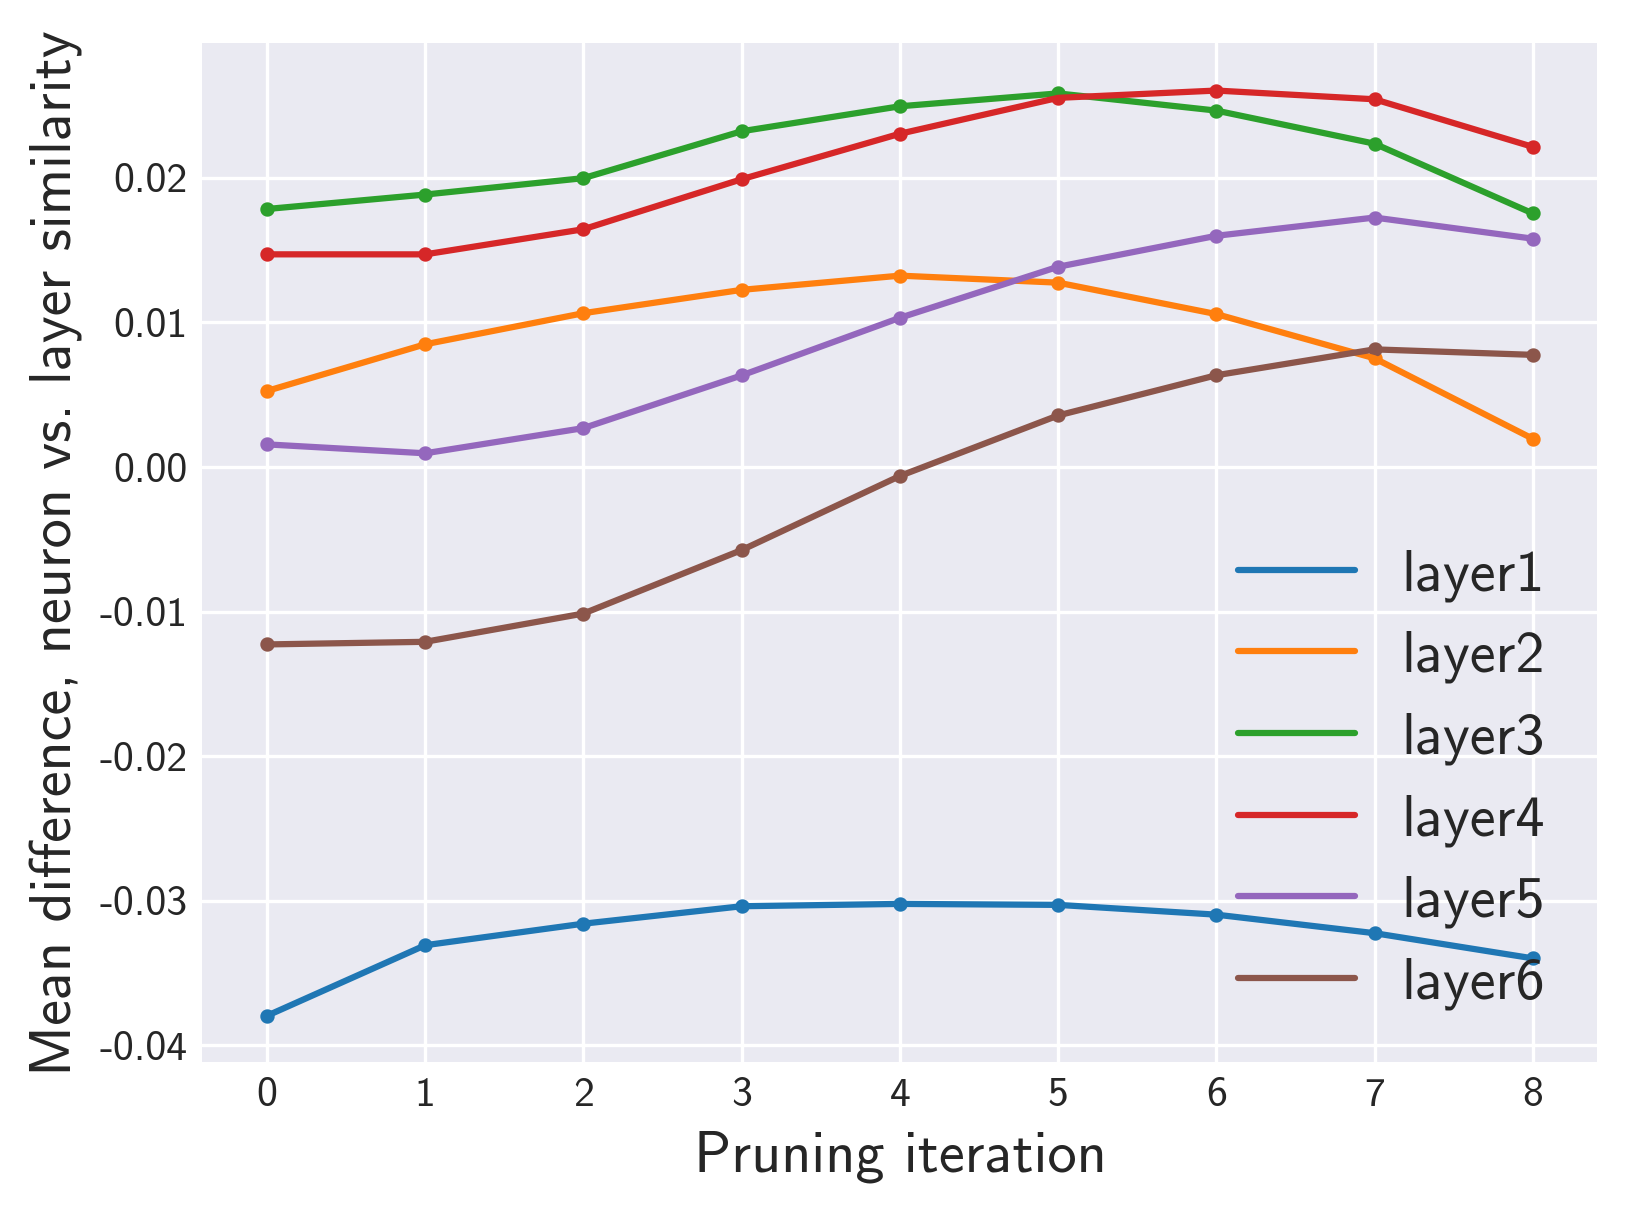

In [78]:
layer_localization_scores = {layer : [] for layer in ['layer' + str(i) for i in range(1, 7)]}
for layer in layer_localization_scores:
    for model in range(model_count):
        cur_layer = f'LTH{model}-{layer}'
        layer_localization_scores[layer].append(localization_score[cur_layer])
        
plt.figure(figsize = (6, 4.5), dpi=300)
ax = plt.gca()
x = range(model_count)

for layer in layer_localization_scores:
    ax.plot(x, layer_localization_scores[layer], label=layer)
    ax.scatter(x, layer_localization_scores[layer], s=6)
    
plt.xlabel('Pruning iteration', fontsize=14)
plt.ylabel('Mean difference, neuron vs. layer similarity', fontsize=14)
plt.legend(fontsize=14, ncol=1)
plt.show()

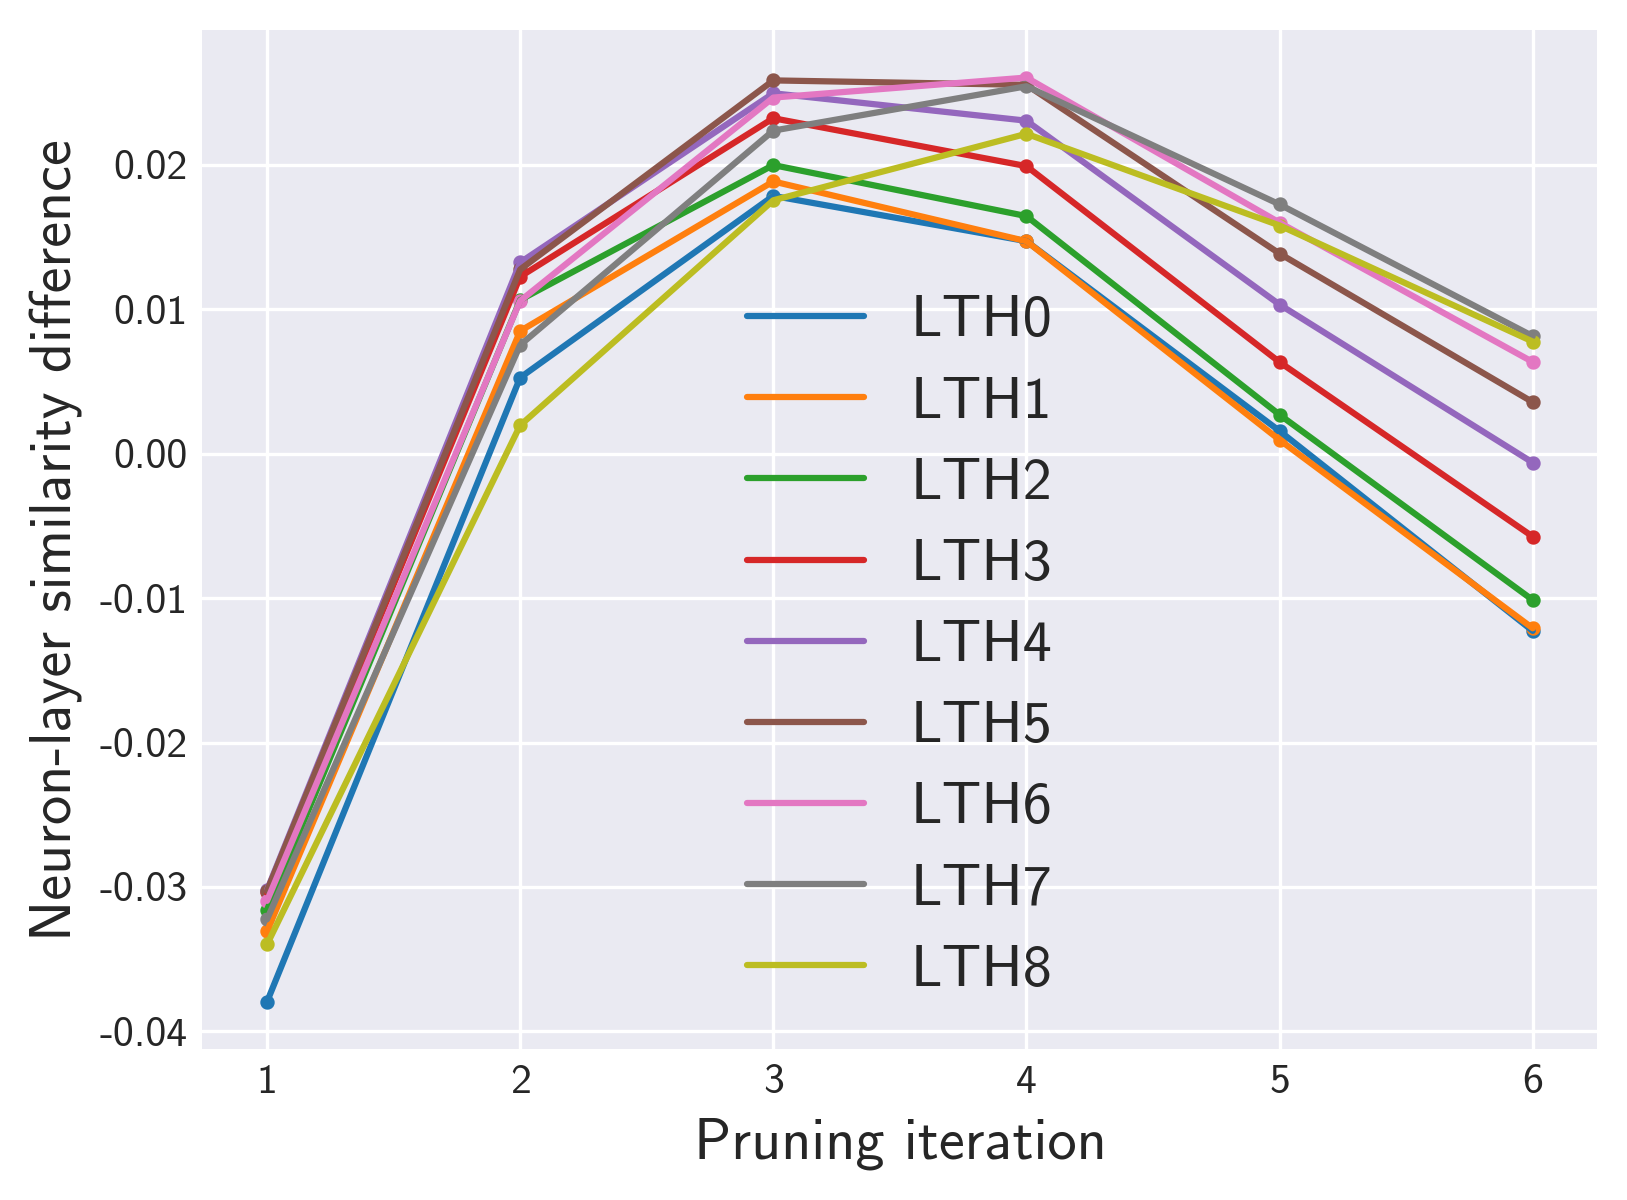

In [56]:
model_localization_scores = {model : [] for model in ['LTH' + str(i) for i in range(model_count)]}
for model in model_localization_scores:
    for layer in range(1,7):
        cur_layer = f'{model}-layer{layer}'
        model_localization_scores[model].append(localization_score[cur_layer])
        
plt.figure(figsize = (6, 4.5), dpi=300)
ax = plt.gca()
x = range(1,7)

for model in model_localization_scores:
    ax.plot(x, model_localization_scores[model], label=model)
    ax.scatter(x, model_localization_scores[model], s=6)
    
plt.xlabel('Pruning iteration', fontsize=14)
plt.ylabel('Neuron-layer similarity difference', fontsize=14)
plt.legend(fontsize=14)
plt.show()